# Measuring Drop Spreading Law

Lili Kovacs<br>
University of Manchester  
February 2023

The following analysis takes three sets of experimental data describing the spreading of a liquid drop and compares two theoretical models describing it: the de Gennes and the Cox-Voinov law. The method of comparison is a linear fit to the averaged data for both and then a residuals plot and $χ^2$ test to describe the goodness of each fit.

## Initialisation
We first initialise our Python interpreter. We import any libraries used later on and define some plotting parameters that we'll keep the same.

In [1]:
import string
from math import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

## Experimental Data

Since the same experiment was repeated 3 times, we have 3 different sets of experimental data. The time values ($t$, measured in seconds) are the same for each experiment while the circle radii data ($R$, measured in micrometers) from the experiments are stored in 3 separate arrays. 

In [2]:
# Radius data in micrometres from experiments 1, 2 and 3 respectively.
radius_data1 = np.array([59.513027, 66.368389, 69.506166, 71.700852, 74.735925, 76.007795, 76.695256, 78.039551, 79.598386, 80.075493, 80.079624, 81.495363, 82.598934, 83.172805, 84.919440, 85.155809, 85.718415, 85.920147, 86.000243, 87.120934, 87.507943, 87.786892, 87.060409, 88.086562, 88.113767, 88.436448, 89.082172, 89.139957, 89.210538, 89.356928, 90.312937, 90.406557, 90.754907, 90.88941, 91.096467])
radius_data2 = np.array([59.810888, 65.360919, 69.088934, 72.594631, 74.694093, 76.440186, 78.133942, 78.618537, 79.753566, 80.745559, 81.422723, 81.634563, 82.861597, 84.335873, 85.362055, 85.537714, 86.159399, 86.873675, 86.918131, 87.003533, 87.126402, 87.155440, 87.224911, 87.394479, 87.433936, 87.626938, 87.701465, 87.834029, 87.963874, 88.153147, 88.209880, 88.542036, 88.86527, 89.082038, 89.214132])
radius_data3 = np.array([58.200029, 64.826353, 69.332991, 73.504694, 74.295033, 77.506575, 78.413291, 79.952682, 81.339708, 81.938359, 82.528196, 82.807452, 83.378999, 84.521468, 84.507216, 85.064265, 85.247146, 85.900079, 86.475709, 86.776052, 87.158810, 87.343755, 87.448085, 87.822712, 88.140434, 88.311032, 88.619312, 88.970210, 89.373613, 89.754486, 89.900430, 90.116608, 90.288358, 90.711677, 90.989783])
# Timestamps
time = np.array([0.500000, 1.000000, 1.500000, 2.000000, 2.500000, 3.000000, 3.500000, 4.000000, 4.500000, 5.000000, 5.500000, 6.000000, 6.500000, 7.000000, 7.500000, 8.000000, 8.500000, 9.000000, 9.500000, 10.000000, 10.500000, 11.000000, 11.500000, 12.000000, 12.500000, 13.000000, 13.500000, 14.000000, 14.500000, 15.000000, 15.500000, 16.000000, 16.500000, 17.000000, 17.500000])

The footprint radii values are plotted below against time with each colour corresponding to one of the experimental runs:

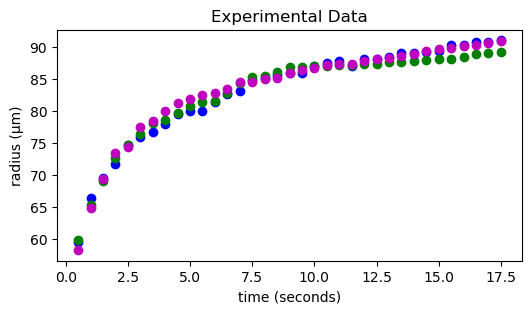

In [3]:
# Setting figure size
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()
# Plotting data from experimental runs 1-3:
plt.plot(time, radius_data1, "bo")
plt.plot(time, radius_data2, "go")
plt.plot(time, radius_data3, "mo")
# Setting axis and figure labels 
plt.xlabel("time (seconds)")
plt.ylabel("radius (μm)")
plt.title("Experimental Data")
# Displaying the plot
plt.show()

To get the final data we will first create a combined array of measured radii of all 3 experiments and then calculate the mean value for each timestamp. The error on a repeated measurement can be estimated from the standard deviation $\sigma_R$, so this is what we use.

In [4]:
radius_data = np.array([radius_data1, radius_data2, radius_data3]) # Combining the three arrays
mean_radius = np.mean(radius_data, axis = 0) # Calculating the mean radius value for each timestamp
radius_errors = np.std(radius_data, axis = 0) # Creating an array of error values for each timestamp

Plot the mean radii with the standard deviation for as the error for each  timestamp to see what it looks like:

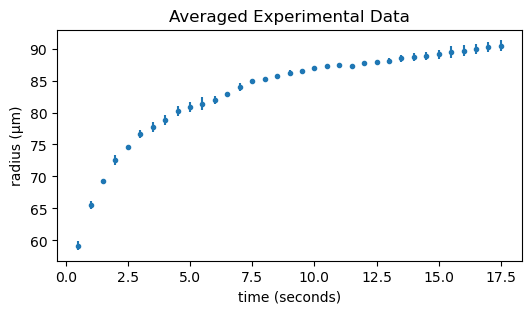

In [5]:
# Plotting averaged data with error:
plt.errorbar(time, mean_radius, radius_errors, fmt=".") 
plt.xlabel("time (seconds)")
plt.ylabel("radius (μm)")
plt.title("Averaged Experimental Data")
plt.show()

## Extracting Quantities Using Experimental Data

The spreading law we are looking for is the relationship between the speed of the contact line ($U$) and the contact angle ($\theta$). We need to first  $U$ and $\theta$ separately, which we can do by from $R=R(t)$. 

The speed of the contact line can be calculated using $U = \frac{dR}{dt} \approx \frac{R(t+\delta t)-R(t)}{\delta t}$, where $R(t+\delta t)$ and $R(t)$ are two sequential values of the footprint radii measured with time intreval $\delta t$ apart. In our case, measurements were all taken 0.5 seconds apart, but the np.diff() function can also be used to create an array of differences between each timestamp. This is also used to find the change in footprint radii as time evolves. As with the radii before, $U$ is calculated for each experiment separately ($U_1$, $U_2$, $U_3$) and then averaged at each point. The error is estimated form the standard deviation, $\sigma_U$.

In [6]:
radius_data1_m = radius_data1*10**(-6) # Convert from micrometres (μm) to metres (m)
radius_data2_m = radius_data2*10**(-6)
radius_data3_m = radius_data3*10**(-6)
U1 = np.diff(radius_data1_m)/np.diff(time) # Calculate instantaneous velocities for each experimental dataset
U2 = np.diff(radius_data2_m)/np.diff(time)
U3 = np.diff(radius_data3_m)/np.diff(time)

speeds = np.array([U1, U2, U3])
mean_speed = np.mean(speeds, axis = 0)
speed_errors = np.std(speeds, axis = 0)
speed_timestamps = np.delete(time, -1) # The number of speed values is one less than timestamps, therefore the last time is removed to plot

Plotting the values for the 3 separate experiments and then the mean value with error bars from the standard deviation:

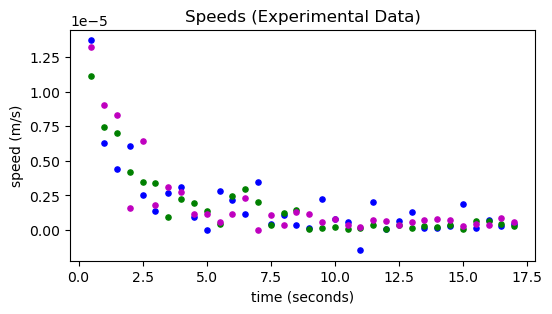

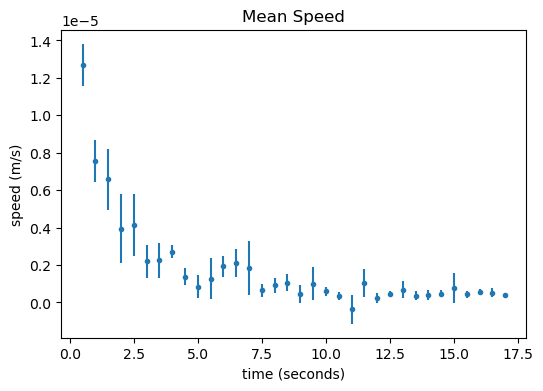

In [7]:
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()
# Plotting speed data from experimental runs 1-3:
plt.scatter(speed_timestamps, U1, color="b", s = 14)
plt.scatter(speed_timestamps, U2, color="g", s = 14)
plt.scatter(speed_timestamps, U3, color="m", s = 14)
plt.xlabel("time (seconds)")
plt.ylabel("speed (m/s)")
plt.title("Speeds (Experimental Data)")
plt.show()

plt.rcParams["figure.figsize"] = (6,4)
plt.figure()
# Plotting averaged data with error:
plt.errorbar(speed_timestamps, mean_speed, speed_errors, fmt=".")
plt.xlabel("time (seconds)")
plt.ylabel("speed (m/s)")
plt.title("Mean Speed")
plt.show()

To find the contact angle, we make the spherical cap approximation that allows us to calculate the height of the drop ($H$) from its volume ($V=7.6$ pL) and its footprint radius ($R$) by $V=\frac{\pi}{6}H(3R^2+H^2)$. The contact angle can then be found from $R$ and $H$ using $\theta = \frac{\pi}{2} - \mathrm{atan}\frac{R^2-H^2}{2HR}$. 

In [8]:
volume = 7.6E-15 # Convertin 7.6 pL to m^3
droplet_heights = [[],[],[]] # Defining the dimensions of the array containing heights to be the same as for radius_data
theta = [[],[],[]]
H0 = 0.001 # fsolve needs a starting value
radius_data_m = radius_data*10**(-6) # Array in metres

# This is the equation relating V, H and R, rearranged to 0 to be compatible with fsolve
def spherical_cap_approx (max_height, radius):
    return np.pi/6*max_height*(3*radius**2+max_height**2)-volume

# This for loop iterates over elements to fill ip the array containing the heights using the corresponding values of R
for i in range(3):
    for radius in radius_data_m[i,:]:
        droplet_heights[i] = np.append(droplet_heights[i], fsolve(spherical_cap_approx, H0, args=(radius)))
heights = np.asarray(droplet_heights)

# Calculating contact angles
theta = np.pi/2-np.arctan((radius_data_m**2-heights**2)/(2*heights*radius_data_m))
mean_theta = np.mean(theta, axis = 0)
theta_errors = np.std(theta, axis = 0)

Now plotting the experimental and averaged values of θ against time:

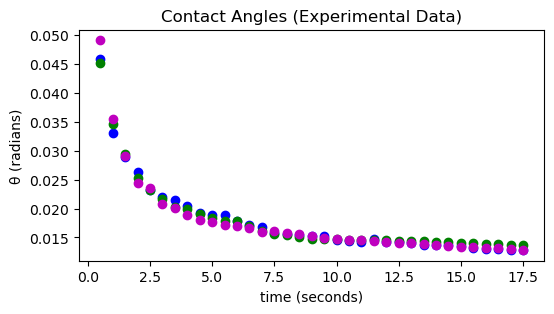

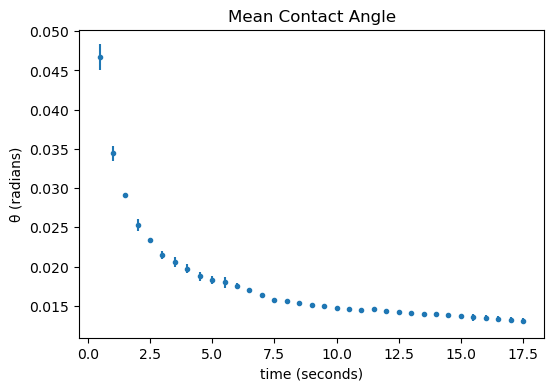

In [9]:
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()
plt.plot(time, theta[0], "bo")
plt.plot(time, theta[1], "go")
plt.plot(time, theta[2], "mo") 
plt.xlabel("time (seconds)")
plt.ylabel("θ (radians)")
plt.title("Contact Angles (Experimental Data)")
plt.show()

plt.rcParams["figure.figsize"] = (6,4)
plt.figure()
plt.errorbar(time, mean_theta, theta_errors, fmt=".")  
plt.xlabel("time (seconds)")
plt.ylabel("θ (radians)")
plt.title("Mean Contact Angle")
plt.show()

Now that we've seen both how $U$ and θ develop with time, let's plot them against each other to see $U=U(\theta)$. First for each experiment and then the averaged values:

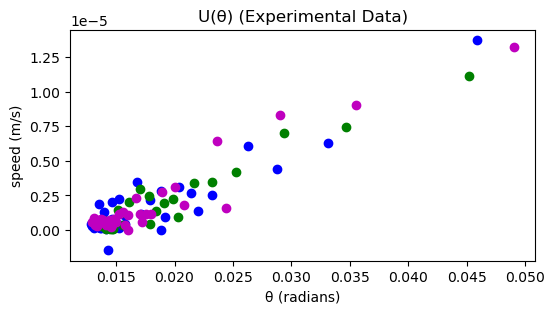

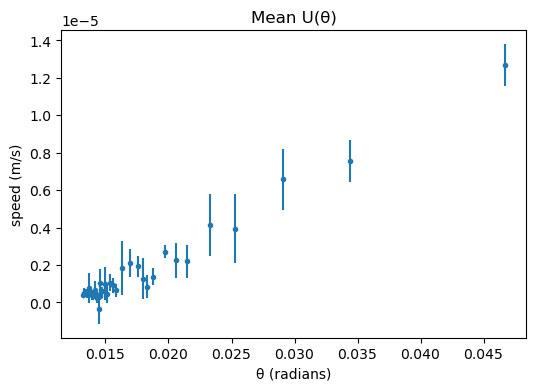

In [10]:
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()
plt.plot(np.delete(theta[0], -1), U1, "bo")
plt.plot(np.delete(theta[1], -1), U2, "go")
plt.plot(np.delete(theta[2], -1), U3, "mo")
plt.xlabel("θ (radians)")
plt.ylabel("speed (m/s)")
plt.title("U(θ) (Experimental Data)")
plt.show()

plt.rcParams["figure.figsize"] = (6,4)
plt.figure()
plt.errorbar(np.delete(mean_theta, -1), mean_speed, speed_errors, fmt=".")
plt.xlabel("θ (radians)")
plt.ylabel("speed (m/s)")
plt.title("Mean U(θ)")
plt.show()

## Fitting Spreading Laws

To find a spreading law that describes $U(\theta)$, we will fit a straight line to the the de Gennes law ($U = U_0( \theta^2 –  \theta_0^2)$) and Cox-Voinov law ($U = U_0( \theta^3 –  \theta_0^3)$) to the mean data ploted above, where $U_0$ is the characteristic speed of the contact line, and $\theta_0$ is the equilibrium contact angle (when $\theta=\theta_0$, $U=0$). The fit produces the values for the characteristic speed and the error on it $U_0^{fit} \pm \delta U_0^{fit}$. It also gives values for $[U_0\theta^n]^{fit}$ with $n=2$ or $n=3$ respectively, from which $\theta_0$ is computed. The corresponding error $\delta\theta^{fit}$ is found by propagating the errors from  $[U_0\theta^n]^{fit}$ and $U_0^{fit}$.

In [11]:
mean_theta_square = mean_theta**2
mean_theta_cube = mean_theta**3

fit_params, fit_errors = np.polyfit(np.delete(mean_theta_square, -1), mean_speed, 1, cov=True) # Performs a linear fit (y=mx+c). y~U, m~U0, x~θ^2, c~U0*(θ0)^2

U0 = fit_params[0]
theta0 = np.sqrt(np.abs(fit_params[1]) / U0) # Absolute value due to sign of fit parameter
U0_err = np.sqrt(fit_errors[0][0]) # Takes error value from covariance matrix
theta0_err = np.sqrt(fit_errors[1][1]**2/(4*U0**2*theta0**2)+theta0**2*U0_err**2/(4*U0**2)) # Error on θ from error propagation formula

gennes_fit_values = np.polyval(fit_params, np.delete(mean_theta_square, -1)) # Apply fit to our datapoints to predict corresponding values

print('de Gennes law linear np.polyfit values: ')
print('U\u2080 = {:04.5f} \u00B1 {:04.5f} m/s'.format(U0, U0_err))
print('θ\u2080 = {:04.5f} \u00B1 {:04.5f} rad'.format(theta0, theta0_err))

fit_params, fit_errors = np.polyfit(np.delete(mean_theta_cube, -1), mean_speed, 1, cov=True) #y~U, m~U0, x~θ^3, c~U0*(θ0)^3
U0 = fit_params[0]
theta0 = np.cbrt(fit_params[1] / U0)
U0_err = np.sqrt(fit_errors[0][0])
theta0_err = np.sqrt(fit_errors[1][1]**2/(U0**2*theta0**4)+theta0**2*U0_err**2/(U0**2))

coxvoinov_fit_values = np.polyval(fit_params, np.delete(mean_theta_cube, -1))

print('Cox-Voinov law linear np.polyfit values: ')
print('U\u2080 = {:04.5f} \u00B1 {:04.5f} m/s'.format(U0, U0_err)) #formatting
print('θ\u2080 = {:04.5f} \u00B1 {:04.5f} rad'.format(theta0, theta0_err))

de Gennes law linear np.polyfit values: 
U₀ = 0.00657 ± 0.00026 m/s
θ₀ = 0.00963 ± 0.00019 rad
Cox-Voinov law linear np.polyfit values: 
U₀ = 0.13447 ± 0.00870 m/s
θ₀ = 0.01639 ± 0.00106 rad


For each of these linear fits, two graphs are plotted: one including the original datapoints (blue or magenta) and the linear fit (black dashed line) and a residuals plot showing the difference between the measured value and the value predicted by the fit ($U-U^{fit}$). A multiplier of powers of 10 (3 and 4) were used to make the θ axis clearer.

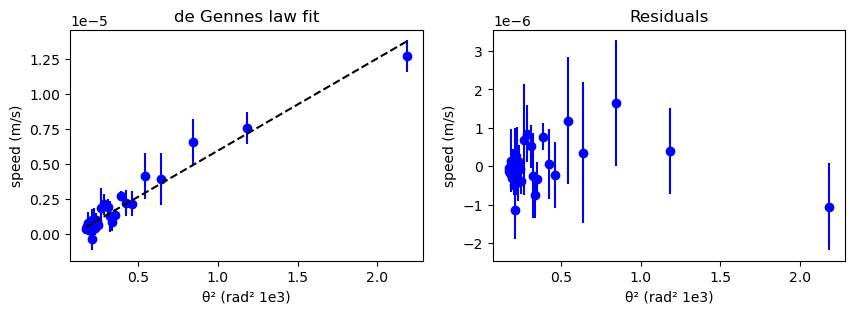

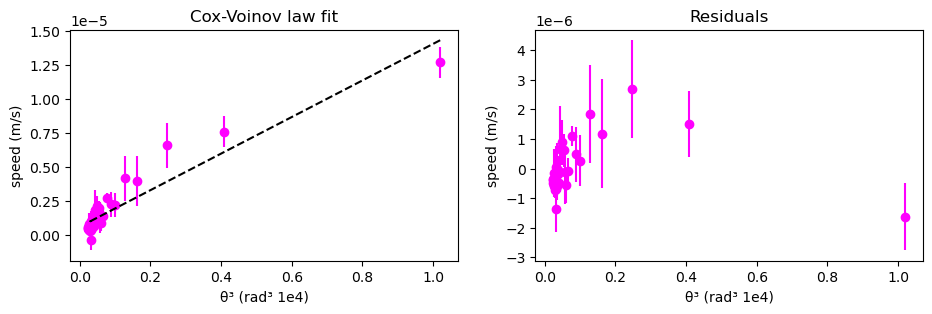

In [12]:
plt.rcParams["figure.figsize"] = (10,3)
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.errorbar(np.delete(mean_theta_square*10**3, -1), mean_speed, speed_errors, fmt=".", ms = 12, color = "b") # Plot averaged experimental data
ax1.errorbar(np.delete(mean_theta_square*10**3, -1), gennes_fit_values, fmt='--', color = "black") # Plot fit
ax1.set(xlabel='θ\u00B2 (rad\u00B2 1e3)')
ax1.set(ylabel='speed (m/s)')
ax1.set_title('de Gennes law fit')

ax2.errorbar(np.delete(mean_theta_square*10**3, -1), mean_speed-gennes_fit_values, speed_errors, fmt=".", ms = 12, color = "b") # Plot difference between experimental and fit values
ax2.set(xlabel='θ\u00B2 (rad\u00B2 1e3)')
ax2.set(ylabel='speed (m/s)')
ax2.set_title('Residuals')

plt.show()

plt.rcParams["figure.figsize"] = (11,3)
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.errorbar(np.delete(mean_theta_cube*10**4, -1), mean_speed, speed_errors, fmt=".", ms = 12, color = "magenta")
ax1.errorbar(np.delete(mean_theta_cube*10**4, -1), coxvoinov_fit_values, fmt='--', color = "black")
ax1.set(xlabel='θ\u00B3 (rad\u00B3 1e4)')
ax1.set(ylabel='speed (m/s)')
ax1.set_title('Cox-Voinov law fit')

ax2.errorbar(np.delete(mean_theta_cube*10**4, -1), mean_speed-coxvoinov_fit_values, speed_errors, fmt=".", ms = 12, color = "magenta")
ax2.set(xlabel='θ\u00B3 (rad\u00B3 1e4)')
ax2.set(ylabel='speed (m/s)')
ax2.set_title('Residuals')

plt.show()

## Chi-squared Test

To test the goodness of these fits, we conduct a chi-squared test. While examining the residual plots, one fit shows more significant devaitions from reality than the other, this can be confirmed with a numerical value. The reduced-chi-square (chi-square divided by the number of degrees of freedom) gives us this exactly, providing a way to quantify how descriptive the theory is of the experimental data. A reduced chi-square between 0.8 and 1.5 indicates a good fit.

In [13]:
# Calculates reduced chi-square given a set of experimental and predicted values with errors and number of free parameters
def red_chi_square(U, U_fit, U_err, n_params): # n_params=2 for both of our fits (U0 and θ0)
    return np.sum(((U-U_fit)/U_err)**2)/(np.size(U)-(n_params))

red_chi2_gennes = red_chi_square(mean_speed, gennes_fit_values, speed_errors, 2)
red_chi2_coxvoinov = red_chi_square(mean_speed, coxvoinov_fit_values, speed_errors, 2)

print('The reduced χ\u00B2 for the Gennes law is ', red_chi2_gennes, '.')
print('The reduced χ\u00B2 for the Cox-Voinov law is ', red_chi2_coxvoinov, '.')

The reduced χ² for the Gennes law is  1.069378885911401 .
The reduced χ² for the Cox-Voinov law is  3.494637367834011 .


## Drop Spreading Law

The results of the chi-squared analysis suggest that the de Gennes law is a better fit for the behaviour of the spreading drop because its associated reduced $χ^2$ value is much closer to 1, indicating that the differences between the measured and predicted values are consistent with the uncertainties we predicted. (The $χ^2$ value of the Cox-Voinov law implies that the deviations from the theoretical fit are larger than allowed by the errors and therefore this fit is not descriptive enough.) This conclusion could have been made from the residuals plot as well, but only qualitatively.